In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [182]:
movies = pd.read_csv('imdb_top_1000.csv')


In [184]:
movies.shape

(1000, 16)

In [186]:
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [188]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [190]:
movies['Genre'].value_counts()

Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

In [13]:
# DATA CLEANUP PREPROCESSING

In [15]:
movies.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [17]:
# Fill missing Meta_score with the median score
movies['Meta_score'].fillna(movies['Meta_score'].median(), inplace=True)

# Drop rows where Gross is missing (or convert and fill with median)
movies.dropna(subset=['Gross'], inplace=True)
movies.dropna(subset = ['Released_Year'], inplace = True)
# Fill missing Certificate values with 'Not Rated'
movies['Certificate'].fillna('Not Rated', inplace=True)


/var/folders/5t/w2l7kzdd4w1brx4655qwzqjr0000gn/T/ipykernel_24824/2002303910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['Meta_score'].fillna(movies['Meta_score'].median(), inplace=True)
/var/folders/5t/w2l7kzdd4w1brx4655qwzqjr0000gn/T/ipykernel_24824/2002303910.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [19]:
movies.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [21]:
# Convert Released_Year to numeric (handling 'TV Movie' cases)
movies['Released_Year'] = pd.to_numeric(movies['Released_Year'], errors='coerce')

# Convert Runtime to integer
movies['Runtime'] = movies['Runtime'].str.replace(' min', '').astype(int)

# Convert Gross to integer (remove commas first)
movies['Gross'] = movies['Gross'].str.replace(',', '').astype(float)


In [23]:
# Ensure 'Genre' is a string and then split by comma
movies['Genre'] = movies['Genre'].astype(str).str.split(',')

# Explode the genre column to have one genre per row
movies_exploded = movies.explode('Genre')

# Strip any leading/trailing spaces
movies_exploded['Genre'] = movies_exploded['Genre'].str.strip()


In [25]:
movies_exploded['Genre'].value_counts()

Genre
Drama        597
Comedy       191
Crime        171
Adventure    170
Action       156
Thriller     110
Romance      107
Biography     96
Mystery       84
Animation     67
Sci-Fi        61
Fantasy       56
Family        48
History       43
War           37
Music         33
Horror        22
Sport         19
Western       16
Musical       14
Film-Noir     11
Name: count, dtype: int64

In [27]:
movies_exploded.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [29]:
movies['Released_Year'] = pd.to_numeric(movies['Released_Year'], errors='coerce')

# Create a new column for decade
movies['Decade'] = (movies['Released_Year'] // 10) * 10
# floor division " // " removes remainder

# Group by decade and calculate average IMDB rating
decade_avg = movies.groupby('Decade')['IMDB_Rating'].mean().reset_index()

In [31]:
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1990.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,1970.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,2000.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,1970.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"[Crime, Drama]",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,1950.0


In [33]:
# EDA

In [35]:
# MOST POPULAR DIRECTORS
movies['Director'].value_counts().head(10)


Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Christopher Nolan     8
Quentin Tarantino     8
David Fincher         8
Woody Allen           8
Clint Eastwood        8
Rob Reiner            7
Hayao Miyazaki        7
Name: count, dtype: int64

In [37]:
# MOVIES BY CRISTOPHER NOLAN
movies_CN = movies[movies['Director']=='Christopher Nolan']
movies_CN[['Series_Title','IMDB_Rating']]

,Series_Title,IMDB_Rating
2,The Dark Knight,9.0
8,Inception,8.8
21,Interstellar,8.6
36,The Prestige,8.5
63,The Dark Knight Rises,8.4
69,Memento,8.4
155,Batman Begins,8.2
573,Dunkirk,7.8


In [39]:
# UNIVARIATE ANALYSIS

In [42]:
top_directors = movies['Director'].value_counts().head(10)
top_directors

Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Christopher Nolan     8
Quentin Tarantino     8
David Fincher         8
Woody Allen           8
Clint Eastwood        8
Rob Reiner            7
Hayao Miyazaki        7
Name: count, dtype: int64

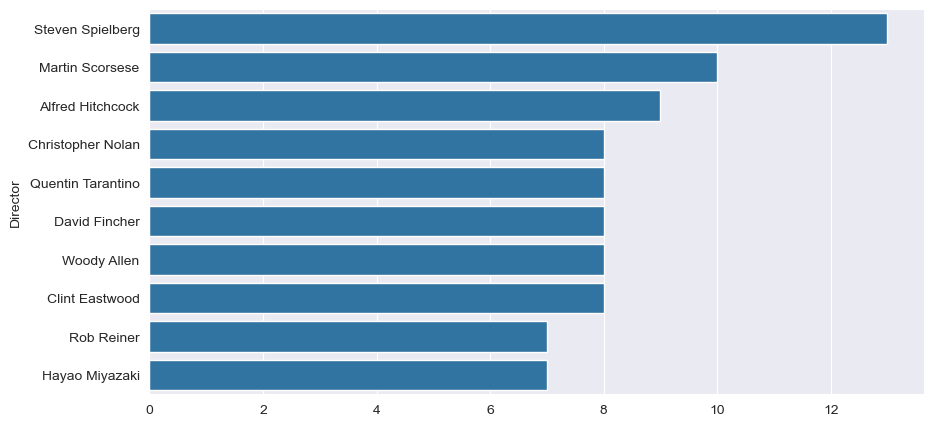

In [44]:

plt.figure(figsize = (10,5))
sns.barplot(x = top_directors.values, y = top_directors.index )
plt.show()

In [45]:
top_grossing = movies.sort_values(by='Gross', ascending=False).head(10)
top_grossing[['Series_Title','Gross']]

,Series_Title,Gross
477,Star Wars: Episode VII - The Force Awakens,936662225.0
59,Avengers: Endgame,858373000.0
623,Avatar,760507625.0
60,Avengers: Infinity War,678815482.0
652,Titanic,659325379.0
357,The Avengers,623279547.0
891,Incredibles 2,608581744.0
2,The Dark Knight,534858444.0
582,Rogue One,532177324.0
63,The Dark Knight Rises,448139099.0


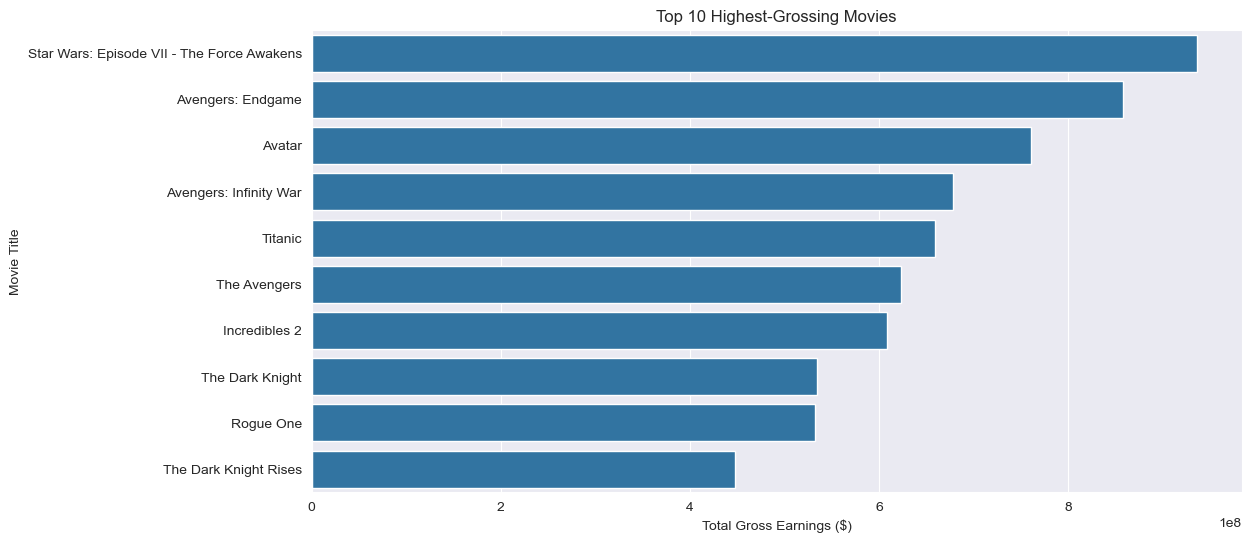

In [46]:

plt.figure(figsize=(12,6))
sns.barplot(x='Gross', y='Series_Title', data=top_grossing)
plt.xlabel("Total Gross Earnings ($)")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest-Grossing Movies")
plt.show()


In [47]:
top_imdb = movies.sort_values(by = 'IMDB_Rating', ascending = False).head(5)
top_imdb[['Series_Title','IMDB_Rating']]

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0


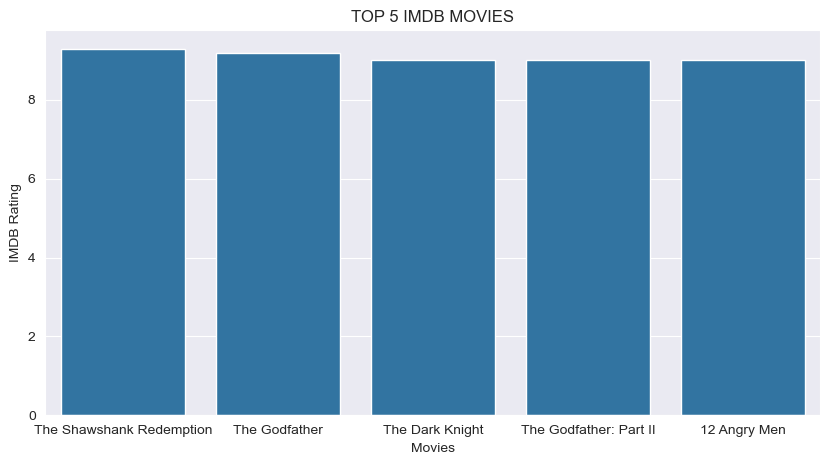

In [49]:

plt.figure(figsize = (10,5))
sns.barplot(x = 'Series_Title', y = 'IMDB_Rating', data = top_imdb )
plt.title('TOP 5 IMDB MOVIES')
plt.xlabel('Movies')
plt.ylabel('IMDB Rating')
plt.show()


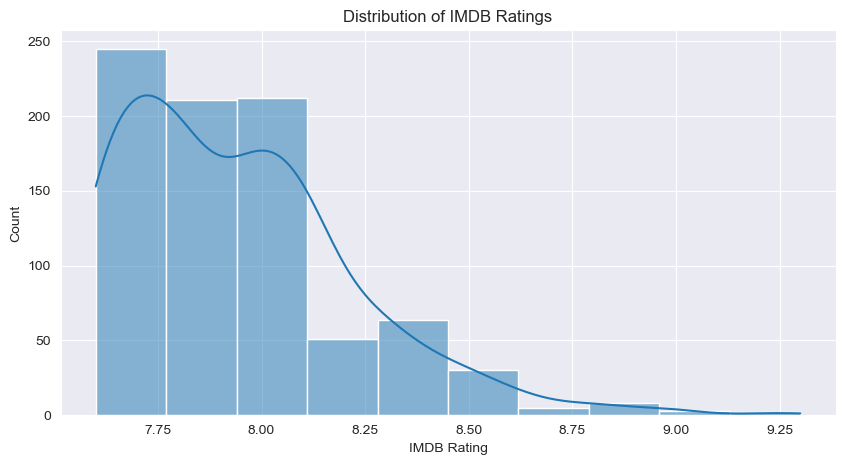

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(movies['IMDB_Rating'], bins=10, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Count')
plt.show()


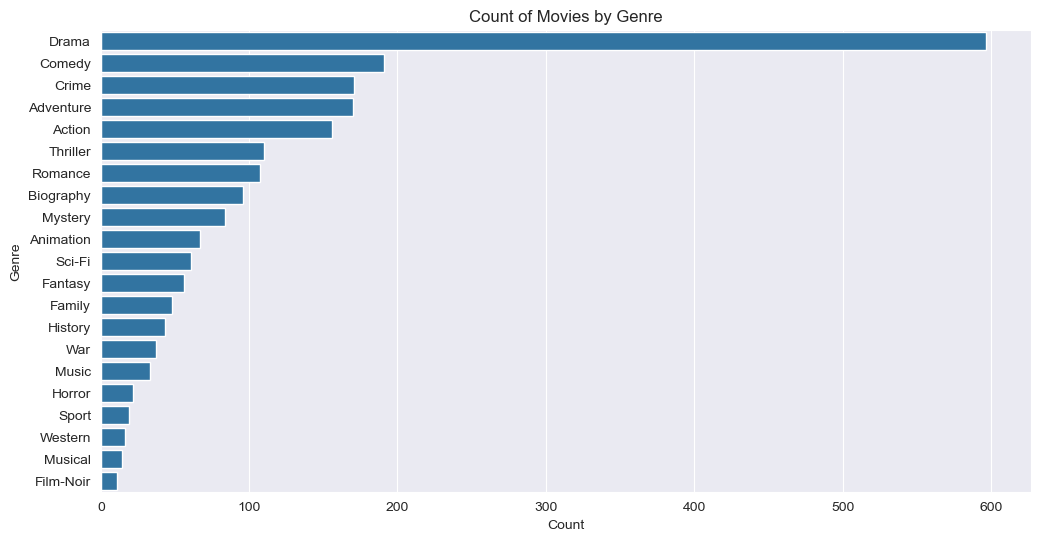

In [52]:
# # Ensure 'Genre' is a string and then split by comma
# movies['Genre'] = movies['Genre'].astype(str).str.split(',')

# # Explode the genre column to have one genre per row
# movies_exploded = movies.explode('Genre')

# # Strip any leading/trailing spaces
# movies_exploded['Genre'] = movies_exploded['Genre'].str.strip()

plt.figure(figsize=(12,6))
sns.countplot(y=movies_exploded['Genre'], order=movies_exploded['Genre'].value_counts().index)
plt.title('Count of Movies by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


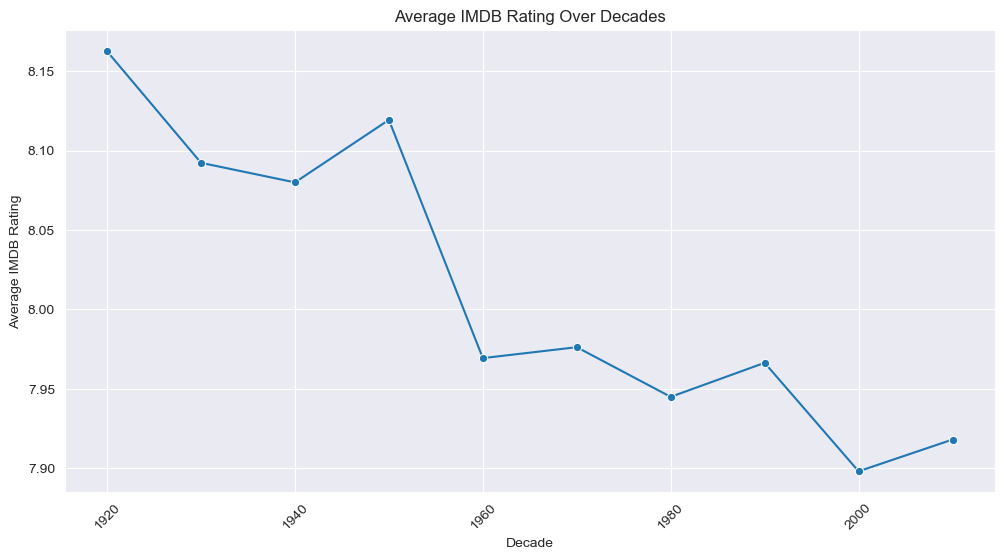

In [55]:
# movies['Released_Year'] = pd.to_numeric(movies['Released_Year'], errors='coerce')

# # Create a new column for decade
# movies['Decade'] = (movies['Released_Year'] // 10) * 10

# # Group by decade and calculate average IMDB rating
# decade_avg = movies.groupby('Decade')['IMDB_Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=decade_avg['Decade'], y=decade_avg['IMDB_Rating'], marker='o')

plt.title('Average IMDB Rating Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average IMDB Rating')  
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [57]:
# BIVARIATE ANALYSIS

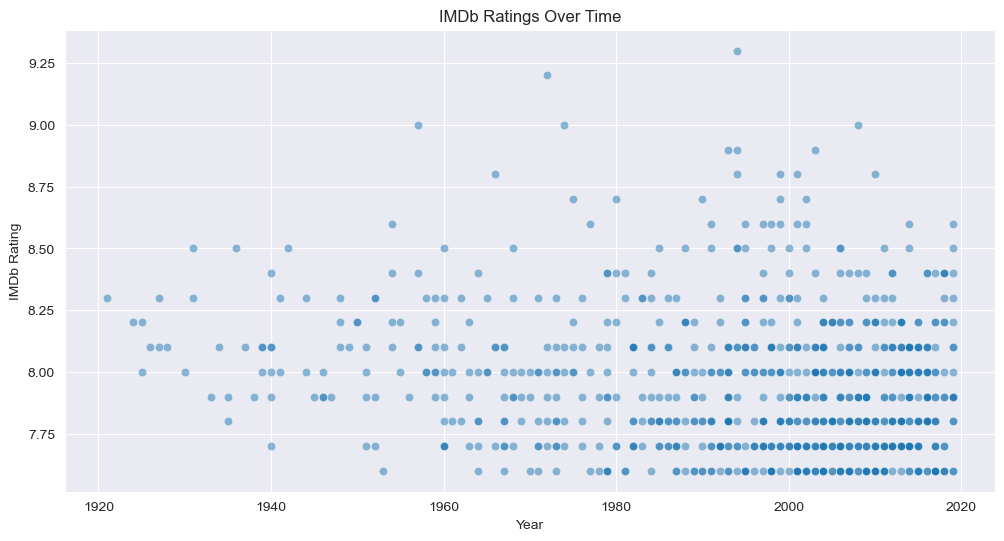

In [58]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Released_Year',y='IMDB_Rating', data = movies,alpha = 0.5)
plt.xlabel("Year")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings Over Time")
plt.show()

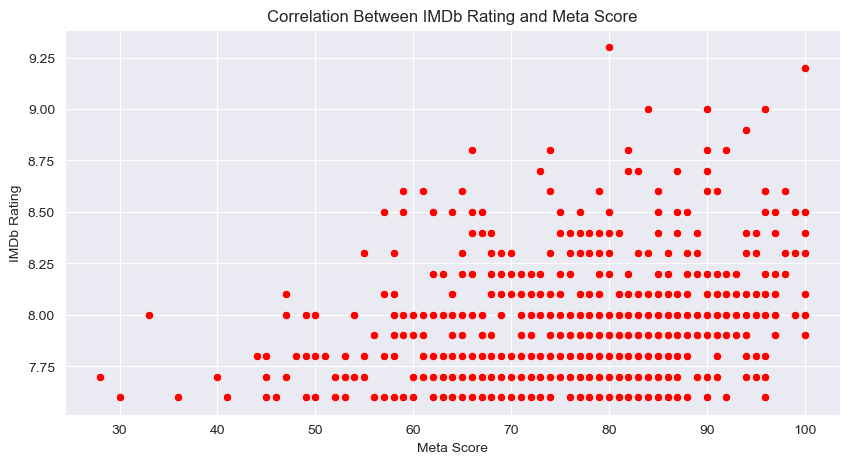

In [59]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=movies, color='red')
plt.xlabel("Meta Score")
plt.ylabel("IMDb Rating")
plt.title("Correlation Between IMDb Rating and Meta Score")
plt.show()


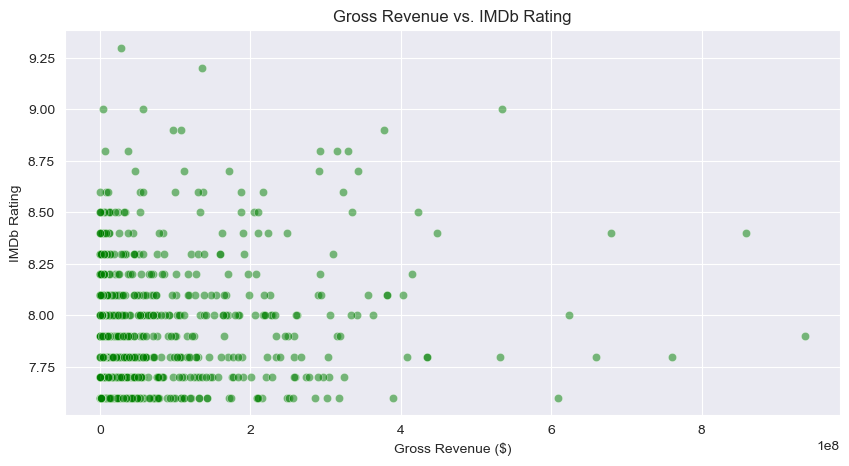

In [60]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Gross', y='IMDB_Rating', data=movies, alpha=0.5, color="green")
plt.xlabel("Gross Revenue ($)")
plt.ylabel("IMDb Rating")
plt.title("Gross Revenue vs. IMDb Rating")
plt.show()


In [62]:
# MULTIVARIATE ANALYSIS

In [63]:
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1990.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,1970.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,2000.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,1970.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"[Crime, Drama]",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,1950.0


In [64]:
movies_corr = movies[['Released_Year','IMDB_Rating','Meta_score','No_of_Votes','Gross',]]
movies_corr.head()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994.0,9.3,80.0,2343110,28341469.0
1,1972.0,9.2,100.0,1620367,134966411.0
2,2008.0,9.0,84.0,2303232,534858444.0
3,1974.0,9.0,90.0,1129952,57300000.0
4,1957.0,9.0,96.0,689845,4360000.0


In [66]:
movies_corr.corr()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,-0.175014,-0.274692,0.211439,0.233250
IMDB_Rating,-0.175014,1.000000,0.278951,0.551261,0.095923
Meta_score,-0.274692,0.278951,1.000000,0.000829,-0.037366
No_of_Votes,0.211439,0.551261,0.000829,1.000000,0.574393
Gross,0.233250,0.095923,-0.037366,0.574393,1.000000


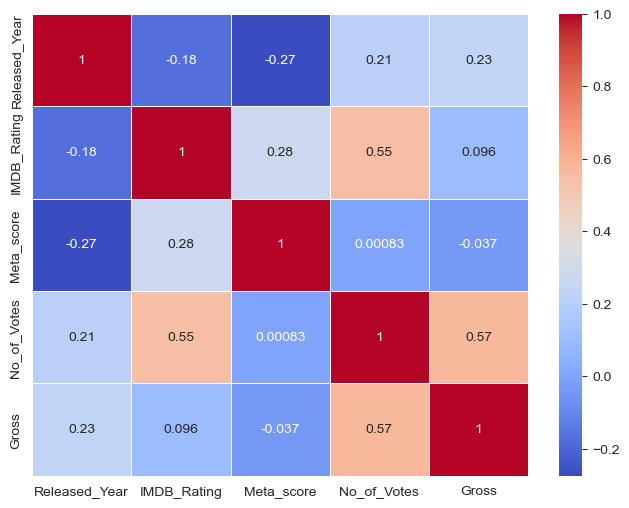

In [67]:
plt.figure(figsize = (8,6))
sns.heatmap(movies_corr.corr(),annot = True, cmap= 'coolwarm',linewidths = 0.5)
plt.show()

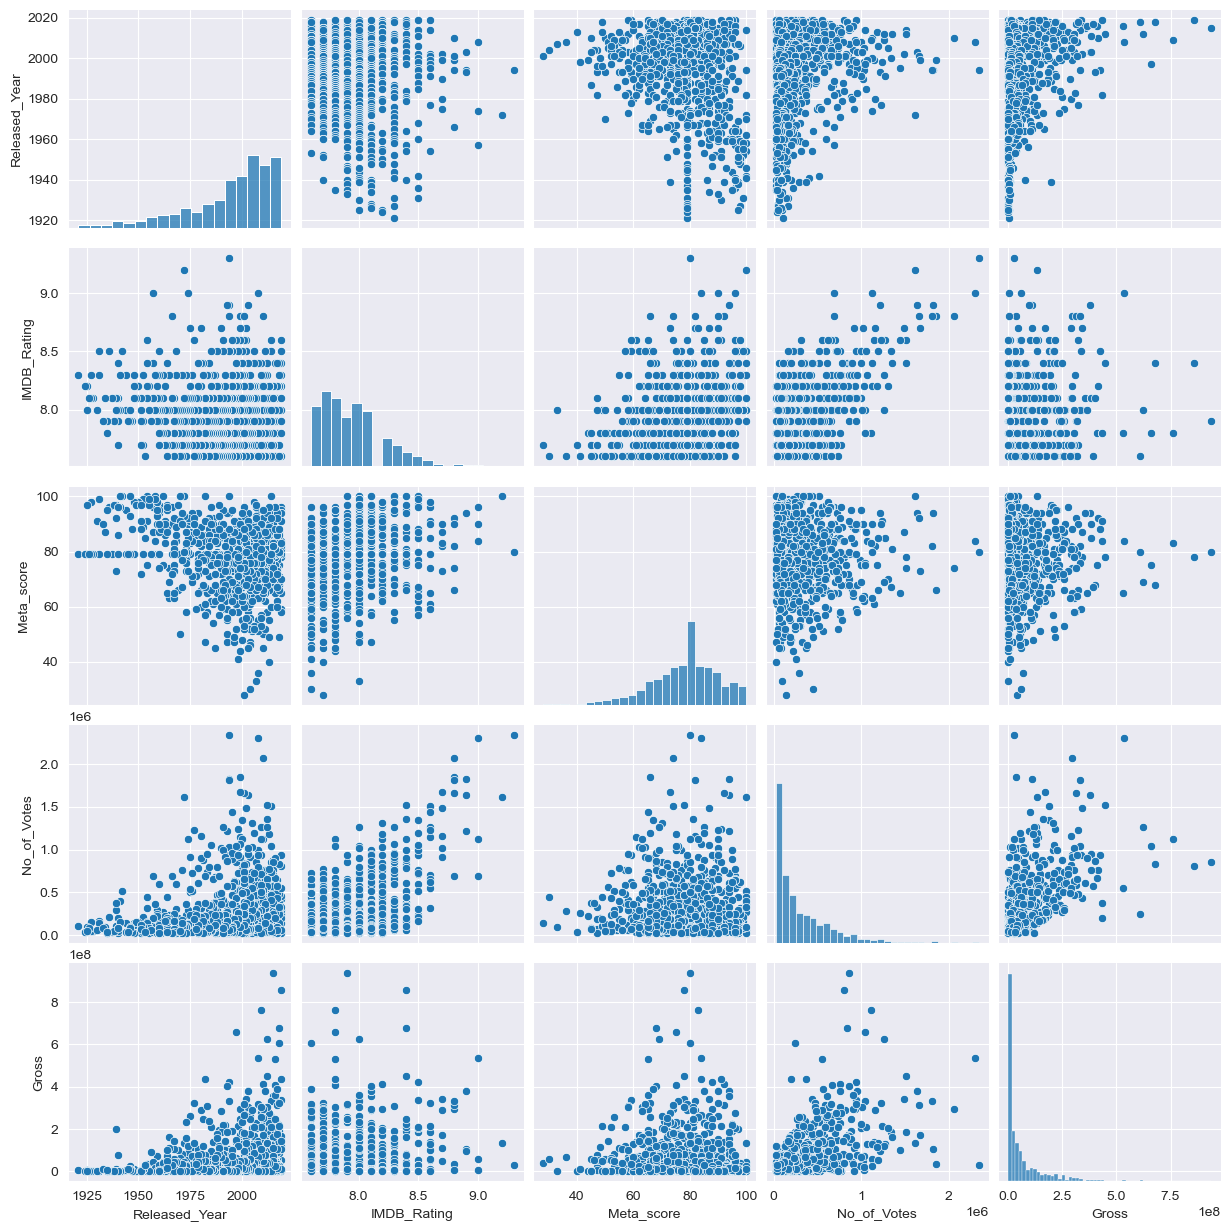

In [68]:
sns.pairplot(movies_corr)
plt.show()

In [69]:
avg_imdb_by_genre = movies_exploded.groupby("Genre")["IMDB_Rating"].mean().sort_values(ascending=False)
avg_imdb_by_genre

Genre
Western      8.037500
War          8.018919
Film-Noir    8.009091
Sci-Fi       7.991803
Mystery      7.969048
Adventure    7.962941
Crime        7.959649
Drama        7.953936
Action       7.946795
Romance      7.929907
Sport        7.926316
History      7.925581
Biography    7.925000
Animation    7.922388
Thriller     7.920909
Musical      7.914286
Music        7.909091
Fantasy      7.905357
Comedy       7.896859
Family       7.889583
Horror       7.877273
Name: IMDB_Rating, dtype: float64

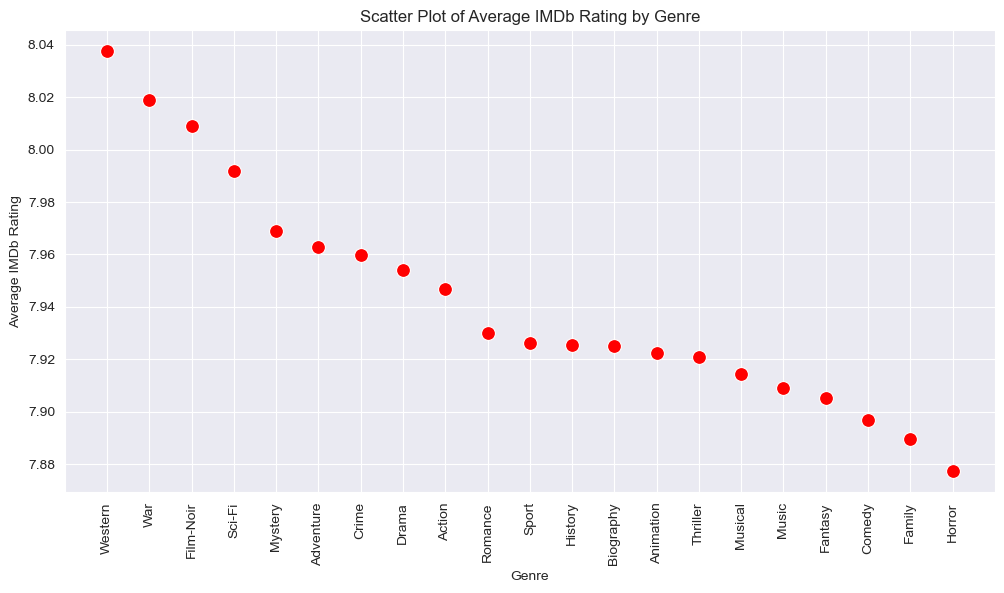

In [72]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=avg_imdb_by_genre.index, y=avg_imdb_by_genre.values, color="red", s=100)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average IMDb Rating")
plt.title("Scatter Plot of Average IMDb Rating by Genre")
plt.show()


In [73]:
# We can conclude that War genre has highest IMDB rating in general and Horror genre has lowest ratings

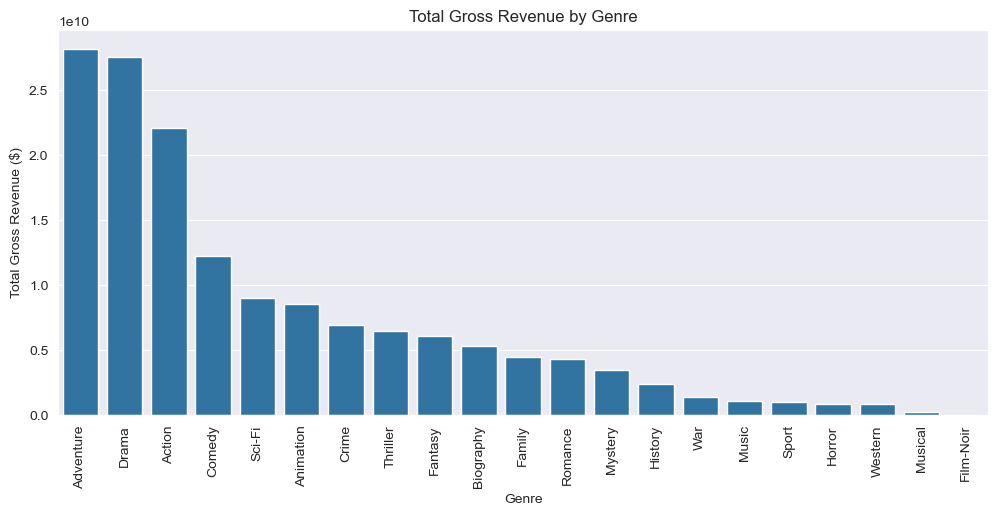

In [74]:
# Calculate total Gross revenue per Genre
gross_by_genre = movies_exploded.groupby("Genre")["Gross"].sum().sort_values(ascending=False)

# Plot Gross Revenue by Genre
plt.figure(figsize=(12,5))
sns.barplot(x=gross_by_genre.index, y=gross_by_genre.values)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Total Gross Revenue ($)")
plt.title("Total Gross Revenue by Genre")
plt.show()


In [76]:
movies.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Decade'],
      dtype='object')

In [77]:
movies2 = movies[['Poster_Link','Series_Title','Genre','Overview','Director','Star1','Star2','Star3','Star4']]
movies2.head()

,Poster_Link,Series_Title,Genre,Overview,Director,Star1,Star2,Star3,Star4
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,[Drama],Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"[Crime, Drama]",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,"[Action, Crime, Drama]",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,"[Crime, Drama]",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,"[Crime, Drama]",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [79]:
movies2.shape

(831, 9)

In [80]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nisumlimbu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [85]:
movies2 = movies2.copy()

In [87]:
movies2['Overview']=list(map(lambda x: " ".join([i for i in x.lower().split() if i not in stop_words]), movies2['Overview']))
movies2.head()

,Poster_Link,Series_Title,Genre,Overview,Director,Star1,Star2,Star3,Star4
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,[Drama],"two imprisoned men bond number years, finding ...",Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"[Crime, Drama]",organized crime dynasty's aging patriarch tran...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,"[Action, Crime, Drama]",menace known joker wreaks havoc chaos people g...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,"[Crime, Drama]",early life career vito corleone 1920s new york...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,"[Crime, Drama]",jury holdout attempts prevent miscarriage just...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [88]:
movies2['Overview'] = movies2['Overview'].apply(lambda x:x.split())

In [90]:
movies2.head()

,Poster_Link,Series_Title,Genre,Overview,Director,Star1,Star2,Star3,Star4
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,[Drama],"[two, imprisoned, men, bond, number, years,, f...",Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"[Crime, Drama]","[organized, crime, dynasty's, aging, patriarch...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,"[Action, Crime, Drama]","[menace, known, joker, wreaks, havoc, chaos, p...",Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,"[Crime, Drama]","[early, life, career, vito, corleone, 1920s, n...",Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,"[Crime, Drama]","[jury, holdout, attempts, prevent, miscarriage...",Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [91]:
movies2['Director'] = movies2['Director'].apply(lambda x: "".join(i.replace(" ", "") for i in x))

In [92]:
movies2['Star1'] = movies2['Star1'].apply(lambda x: "".join(i.replace(" ", "") for i in x))
movies2['Star2'] = movies2['Star2'].apply(lambda x: "".join(i.replace(" ", "") for i in x))
movies2['Star3'] = movies2['Star3'].apply(lambda x: "".join(i.replace(" ", "") for i in x))
movies2['Star4'] = movies2['Star4'].apply(lambda x: "".join(i.replace(" ", "") for i in x))

In [93]:
movies2['tags'] = movies2['Genre'].apply(lambda x: " ".join(x)) + " " + \
                  movies2['Overview'].apply(lambda x: " ".join(x)) + " " + \
                  movies2['Director'] + " " + \
                  movies2['Star1'] + " " + \
                  movies2['Star2'] + " " + \
                  movies2['Star3'] + " " + \
                  movies2['Star4']

In [94]:
movies2.head()

,Poster_Link,Series_Title,Genre,Overview,Director,Star1,Star2,Star3,Star4,tags
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,[Drama],"[two, imprisoned, men, bond, number, years,, f...",FrankDarabont,TimRobbins,MorganFreeman,BobGunton,WilliamSadler,"Drama two imprisoned men bond number years, fi..."
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"[Crime, Drama]","[organized, crime, dynasty's, aging, patriarch...",FrancisFordCoppola,MarlonBrando,AlPacino,JamesCaan,DianeKeaton,Crime Drama organized crime dynasty's aging p...
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,"[Action, Crime, Drama]","[menace, known, joker, wreaks, havoc, chaos, p...",ChristopherNolan,ChristianBale,HeathLedger,AaronEckhart,MichaelCaine,Action Crime Drama menace known joker wreaks...
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,"[Crime, Drama]","[early, life, career, vito, corleone, 1920s, n...",FrancisFordCoppola,AlPacino,RobertDeNiro,RobertDuvall,DianeKeaton,Crime Drama early life career vito corleone 1...
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,"[Crime, Drama]","[jury, holdout, attempts, prevent, miscarriage...",SidneyLumet,HenryFonda,LeeJ.Cobb,MartinBalsam,JohnFiedler,Crime Drama jury holdout attempts prevent mis...


In [95]:
new_df = movies2[['Poster_Link','Series_Title','tags']]
new_df.head()

,Poster_Link,Series_Title,tags
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,"Drama two imprisoned men bond number years, fi..."
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,Crime Drama organized crime dynasty's aging p...
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,Action Crime Drama menace known joker wreaks...
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,Crime Drama early life career vito corleone 1...
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,Crime Drama jury holdout attempts prevent mis...


In [96]:
new_df['tags'][0]

'Drama two imprisoned men bond number years, finding solace eventual redemption acts common decency. FrankDarabont TimRobbins MorganFreeman BobGunton WilliamSadler'

In [97]:
import re
new_df = new_df.copy()
new_df['tags'] = new_df['tags'].apply(lambda x: re.sub(r'[.,]', '', x.lower()))


In [100]:
new_df['tags'][0]

'drama two imprisoned men bond number years finding solace eventual redemption acts common decency frankdarabont timrobbins morganfreeman bobgunton williamsadler'

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000,stop_words = 'english')



In [107]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [109]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [110]:
vectors[0]
# MOVIE 1 vector

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
cv.get_feature_names_out()

array(['00', '007', '12', ..., 'zoëkravitz', 'zuckerberg',
       'álvaroguerrero'], dtype=object)

In [113]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [127]:
ps.stem('loving')

'love'

In [133]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)
        

In [136]:
stem('drama two imprisoned men bond number years finding solace eventual redemption acts common decency frankdarabont timrobbins morganfreeman bobgunton williamsadler')

'drama two imprison men bond number year find solac eventu redempt act common decenc frankdarabont timrobbin morganfreeman bobgunton williamsadl'

In [138]:
new_df['tags']= new_df['tags'].apply(lambda x: " ".join([ps.stem(i) for i in re.sub("[^a-zA-Z]"," ", x).split()]).lower())


In [139]:
new_df['tags'][0]

'drama two imprison men bond number year find solac eventu redempt act common decenc frankdarabont timrobbin morganfreeman bobgunton williamsadl'

In [142]:
cv.get_feature_names_out()

array(['00', '007', '12', ..., 'zoëkravitz', 'zuckerberg',
       'álvaroguerrero'], dtype=object)

In [144]:
len(cv.get_feature_names_out())

5000

In [146]:
from sklearn.metrics.pairwise import cosine_similarity

In [148]:
similarity = cosine_similarity(vectors)

In [149]:
similarity[0]

# similarity of movie 1 with other movies:
# similarity of movie 1 with movie 1 is 1 , with movie 2 is 0.05735393

array([1.        , 0.05735393, 0.0559017 , 0.05      , 0.06681531,
       0.1118034 , 0.12126781, 0.05455447, 0.        , 0.06933752,
       0.05330018, 0.05103104, 0.05892557, 0.0559017 , 0.        ,
       0.04490133, 0.        , 0.06454972, 0.05455447, 0.06063391,
       0.08838835, 0.        , 0.06063391, 0.11470787, 0.05103104,
       0.11785113, 0.0521286 , 0.        , 0.06063391, 0.04419417,
       0.05455447, 0.06933752, 0.05892557, 0.06063391, 0.05892557,
       0.05735393, 0.06681531, 0.        , 0.04902903, 0.06454972,
       0.        , 0.0559017 , 0.04642383, 0.        , 0.        ,
       0.0559017 , 0.0559017 , 0.05455447, 0.05892557, 0.06681531,
       0.0559017 , 0.        , 0.04724556, 0.        , 0.        ,
       0.05735393, 0.05455447, 0.05330018, 0.0521286 , 0.        ,
       0.05892557, 0.1720618 , 0.        , 0.        , 0.11470787,
       0.        , 0.05455447, 0.05735393, 0.        , 0.        ,
       0.06063391, 0.        , 0.05103104, 0.09284767, 0.05590

In [151]:
new_df[new_df['Series_Title'] == '12 Angry Men']

,Poster_Link,Series_Title,tags
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,crime drama juri holdout attempt prevent misca...


In [154]:
new_df[new_df['Series_Title'] == '12 Angry Men'].index[0]

4

In [156]:
sorted(list(enumerate(similarity[0])),reverse = True, key = lambda x:x[1])[1:6]

[(413, 0.19364916731037082),
 (61, 0.1720618004029213),
 (286, 0.1720618004029213),
 (156, 0.14433756729740646),
 (767, 0.14433756729740646)]

In [158]:
def recommend(movie):
    movie_index = new_df[new_df['Series_Title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse = True, key = lambda x:x[1])[1:5]
    for i in movies_list:
        print(new_df.iloc[i[0]].Series_Title)
    

In [160]:
recommend('The Dark Knight')

Batman Begins
The Dark Knight Rises
Kill Bill: Vol. 1
The Prestige


In [170]:
import pickle

pickle.dump(new_df,open('movies.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))